# Ex. 1: Gasto com Alimentação (Y) em função da Renda Familiar (X)

In [1]:
#https://www.w3schools.com/python/python_ml_linear_regression.asp#:~:text=Linear%20regression%20uses%20the%20relationship,the%20future%20is%20very%20important.
import matplotlib.pyplot as plt
## Exemplo 1: Os dados a seguir correspondem às variáveis renda
## familiar (X) e gasto com alimentação - Y (em unidades monetárias)
## para uma amostra de 27 famílias. Em que:
## X : Renda Familiar
## Y : Gasto com Alimentação

## Dados
x = [[3], [5], [10], [10], [20], [20], [20], [30], [40], [50], [60], [70], 
       [70], [80], [100], [100], [100], [120], [120], [140], [150], [180], [180], 
       [200], [200], [1000], [2000]]#Renda Familiar
y = [1.5,2.0,6.0,7.0,10.0,12.0,15.0,8.0,10.0,20.0,20.0,25.0,
       30.0,25.0,40.0,35.0,40.0,30.0,40.0,40.0,50.0,40.0,50.0,
       60.0,50.0, 173, 293]#Gasto com Alimentação
#data0 = cbind(consumo = y, renda = x); View(data0)
print("sample size = ", len(x))

sample size =  27


In [2]:
#separating the data in training and test set
# from sklearn.preprocessing import test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
print("training sample size = ", len(x_train))

training sample size =  18


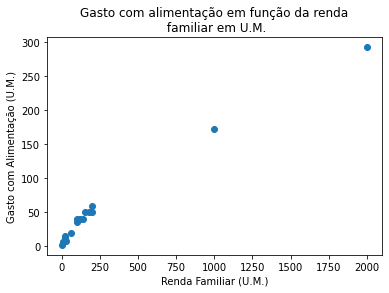

In [3]:
##### Análise de correlação linear entre as variáveis ########
## Gráfico: Diagrama de Dispersão
plt.scatter(x_train, y_train)
plt.xlabel(xlabel="Renda Familiar (U.M.)")
plt.ylabel(ylabel="Gasto com Alimentação (U.M.)")
plt.title(label="Gasto com alimentação em função da renda\n familiar em U.M.")
plt.show()

In [4]:
################## Ajuste do MRLS
## Y = f(x)  + erro = a + b*x + erro
import numpy as np
from sklearn.linear_model import LinearRegression
# from scipy import stats
# slope, intercept, r, p, std_err = stats.linregress(x, y)
model = LinearRegression()
model.fit(x_train, y_train)#o modelo é treinado a partir dos dados de treinamento...
print("Model: consumo = f(renda)  + erro, em que f(renda) = " + str(round(model.intercept_, 2)) + " + " + str(round(float(model.coef_), 2))+"*renda")

Model: consumo = f(renda)  + erro, em que f(renda) = 15.62 + 0.14*renda


In [5]:
#once trained, the model can be used to infer y as a function of a known x:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

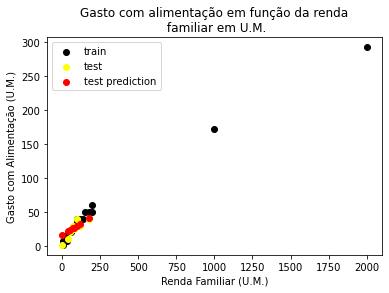

In [6]:
# Plot outputs
plt.scatter(x_train, y_train, color="black")
plt.scatter(x_test, y_test, color="yellow")
plt.scatter(x_test, y_test_pred, color="red")
plt.legend(['train', 'test', 'test prediction'])
# plt.xticks(())
# plt.yticks(())
plt.xlabel(xlabel="Renda Familiar (U.M.)")
plt.ylabel(ylabel="Gasto com Alimentação (U.M.)")
plt.title(label="Gasto com alimentação em função da renda\n familiar em U.M.")
plt.show()

Model: consumo = f(renda) = 15.62 + 0.14*renda
Root Mean squared error (train set): 9.75 UM
Root Mean squared error (test set): 7.33 UM
Mean absolute error (train set): 9.05 UM
Mean absolute error (test set): 5.60 UM
Coefficient of determination (train set): 0.98
Coefficient of determination (test set): 0.63


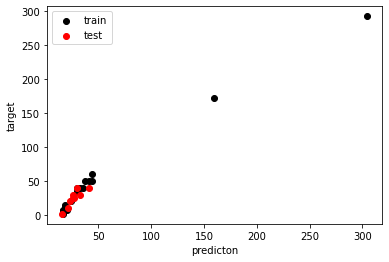

In [7]:
#performance measures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# The model
print("Model: consumo = f(renda) = " + str(round(model.intercept_, 2)) + " + " + str(round(float(model.coef_), 2))+"*renda")
# The root mean squared error: the lesser the better
print("Root Mean squared error (train set): %.2f" % np.sqrt(mean_squared_error(y_train, y_train_pred)) + " UM")
print("Root Mean squared error (test set): %.2f" % np.sqrt(mean_squared_error(y_test, y_test_pred)) + " UM")
# The root mean squared error: the lesser the better
print("Mean absolute error (train set): %.2f" % mean_absolute_error(y_train, y_train_pred) + " UM")
print("Mean absolute error (test set): %.2f" % mean_absolute_error(y_test, y_test_pred) + " UM")
# The coefficient of determination: 1 is perfect prediction (the grater the better)
print("Coefficient of determination (train set): %.2f" % r2_score(y_train, y_train_pred)) 
print("Coefficient of determination (test set): %.2f" % r2_score(y_test, y_test_pred)) 
# Plot outputs
plt.scatter(y_train_pred, y_train, color="black")
plt.scatter(y_test_pred, y_test, color="red")
plt.legend(['train', 'test'])
# plt.xticks(())
# plt.yticks(())
plt.xlabel(xlabel="predicton")
plt.ylabel(ylabel="target")
plt.show()

ShapiroResult(statistic=0.9122918844223022, pvalue=0.0944296196103096)

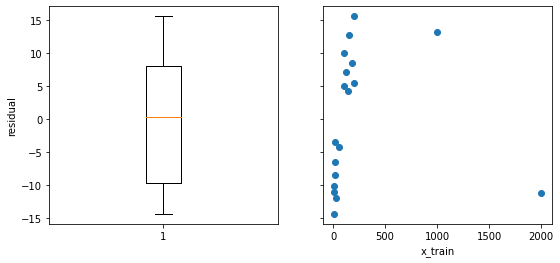

In [8]:
#residuals analyses
e_train = y_train - y_train_pred
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(9,4))
# axs[0].hist(e_train)
# axs[0, 0].set_title('residuals histogram')
# axs[0].set(xlabel='residual', ylabel='frequency')
# axs[0].label_outer()
axs[0].boxplot(e_train)
axs[0].set(ylabel='residual')
# axs[0, 1].label_outer()
# axs[0, 1].set_title('residuals boxplot')
axs[1].scatter(x_train, e_train)
axs[1].set(xlabel='x_train')
# axs[2].set(ylabel='residual')
# axs[1, 0].set_title('y_train_pred vs e_train')
# axs[1, 1].scatter(x_train, e_train)
# axs[1, 1].set_title('x_train vs e_train')
import scipy.stats as stats
stats.shapiro(e_train)

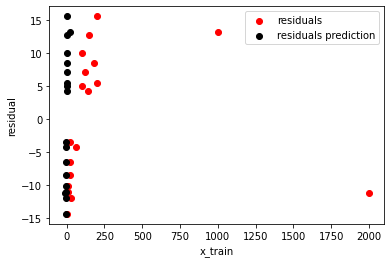

In [9]:
#Boosting concept
#fitting the polynomial regression model to the dataset
#https://iq.opengenus.org/polynomial-regression-using-scikit-learn/
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(x_train)
poly_reg.fit(X_poly, e_train)
reg_residual =LinearRegression()
reg_residual.fit(X_poly, e_train)
plt.scatter(x_train, e_train, color="red")
plt.scatter(reg_residual.predict(X_poly), e_train, color="black")
plt.legend(['residuals', 'residuals prediction'])
# plt.xticks(())
# plt.yticks(())
plt.xlabel(xlabel="x_train")
plt.ylabel(ylabel="residual")
plt.show()

# Ex.2: Precipitação semanal de chuva

In [10]:
import pandas as pd
## Ex.2: Precipitação semanal de chuva
#s_t - estação do ano na semana t - Verão (0) e outono (1)
# x_t - precipitação observada na semana t (em milímetros  - mm)
s_t = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]#Estação do ano
x_t = [2.9, 3.8, 10.5, 17, 16.7, 19, 23.7, 24.9, 24.2, 23.3]#precipitacao (mm)
data = pd.DataFrame({'s_t':s_t, 'x_t':x_t})
data

,s_t,x_t
0,0,2.9
1,0,3.8
2,0,10.5
3,0,17.0
4,0,16.7
5,1,19.0
6,1,23.7
7,1,24.9
8,1,24.2
9,1,23.3


<AxesSubplot:title={'center':'x_t'}, xlabel='s_t'>

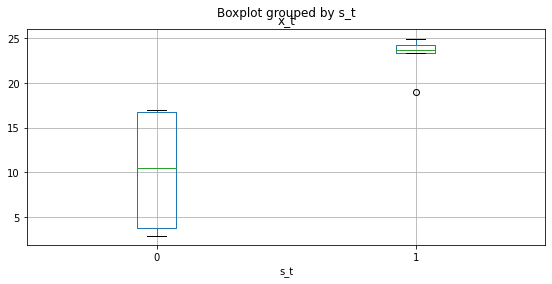

In [11]:
data.boxplot(column='x_t',figsize=(9,4),vert=True, by='s_t')#, xlabel= 's_t', ylabel='x_t')

x_t_1:  [nan, 2.9, 3.8, 10.5, 17, 16.7, 19, 23.7, 24.9, 24.2]


array([[<AxesSubplot:xlabel='s_t', ylabel='s_t'>,
        <AxesSubplot:xlabel='x_t', ylabel='s_t'>,
        <AxesSubplot:xlabel='x_t_1', ylabel='s_t'>],
       [<AxesSubplot:xlabel='s_t', ylabel='x_t'>,
        <AxesSubplot:xlabel='x_t', ylabel='x_t'>,
        <AxesSubplot:xlabel='x_t_1', ylabel='x_t'>],
       [<AxesSubplot:xlabel='s_t', ylabel='x_t_1'>,
        <AxesSubplot:xlabel='x_t', ylabel='x_t_1'>,
        <AxesSubplot:xlabel='x_t_1', ylabel='x_t_1'>]], dtype=object)

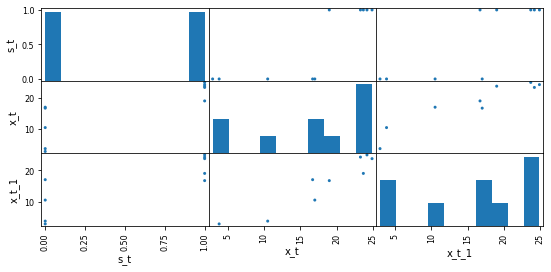

In [12]:
#  Construa um modelo linear que permita estimar a precipitação
# na semana t (x_t) a partir da precipitação observada na
# semana anterior (x_{t-1}) e da estação do ano (s_t)
size = len(data)
x_t_1 = [float('NaN')] + x_t[0:(size-1)]
print('x_t_1: ', x_t_1)
data['x_t_1'] = x_t_1
data.head(size)
pd.plotting.scatter_matrix(data, alpha=1, figsize=(9,4))

In [13]:
#model
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
model = LinearRegression()
data.fillna(inplace = True, method='backfill')#iputing NaN row
data.head()
x = data[['s_t', 'x_t_1']]
y = data[['x_t']]
model.fit(x, y)#o modelo é treinado a partir dos dados de treinamento...
coefs = model.coef_[0].tolist()
# print('coefs: ', coefs)
# print('model.intercept_: ', model.intercept_)
print("Model: precipitação_t = f(estação_t, precpitação_{t-1})  + erro, \n em que f(estação_t, precpitação_{t-1}) = " + 
    str(round(model.intercept_[0], 2)) + " + " + str(round(float(coefs[0]), 2))+"*estação_t" + " + " + 
    str(round(float(coefs[1]), 2))+"*precpitação_{t-1} ml")
stats.shapiro(y - model.predict(x))

Model: precipitação_t = f(estação_t, precpitação_{t-1})  + erro, 
 em que f(estação_t, precpitação_{t-1}) = 4.1 + 1.13*estação_t + 0.82*precpitação_{t-1} ml


ShapiroResult(statistic=0.9268446564674377, pvalue=0.41758307814598083)